In [6]:
import os
from pathlib import Path
import xml.etree.ElementTree as ET
import numpy as np
import cv2
from tqdm.auto import tqdm

In [47]:
def create_masks_from_xml(xml_dir, output_path, class_names_to_IDs):
    # Create the output directory if it doesn't exist
    output_path = Path(output_path)
    output_path.mkdir(parents=True, exist_ok=True)

    # Get a list of all XML files in the specified directory
    xml_files = [f for f in os.listdir(xml_dir) if f.endswith('.xml')]

    for xml_file in tqdm(xml_files):
        # Load the XML file
        xml_path = os.path.join(xml_dir, xml_file)
        tree = ET.parse(xml_path)
        root = tree.getroot()

        # Create an empty mask image 
        width = int(root.find('size/width').text)
        height = int(root.find('size/height').text)
        mask = np.zeros((height, width), dtype=np.uint8)

        # Iterate through the 'object' elements to extract polygon coordinates
        for obj in root.findall('object'):
            polygon = obj.find('polygon')
            if polygon is not None:
                polygon_coords = []
                for point in polygon:
                    if point.tag.startswith('x'):
                        x = float(point.text)
                        y = float(polygon.find(f'y{point.tag[1:]}').text)
                        polygon_coords.append((x, y))
                class_name = obj.find('name').text
                cv2.fillPoly(mask, [np.array(polygon_coords, dtype=np.int32)], color=class_names_to_IDs[class_name])

        filename = root.find('filename').text

        if Path(filename).stem != Path(xml_file).stem:
            print(f'XML file {Path(xml_file).stem} contains incorrect image filename!')

        # Save the mask image with the same filename as in the XML
        # mask_filename = Path(filename).stem + '_mask.png'
        mask_filename = Path(filename).stem + '.png'
        mask_path = os.path.join(output_path, mask_filename)
        cv2.imwrite(mask_path, mask)


class_names_to_IDs = {
    'VirtualWall': 1, 
    'BarrierTape': 2
}
xml_directory = '../data/RotateBarrier.v4i.voc/valid/'  
output_directory = '../data/RotateBarrier.v4i.voc/valid_masks/'  
create_masks_from_xml(xml_directory, output_directory, class_names_to_IDs)


100%|██████████| 101/101 [00:00<00:00, 1810.22it/s]

asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdf


poly=[[10, 10], [10, 20], [40, 10], [10, 10]]
pts=array([[10, 10],
       [10, 20],
       [40, 10],
       [10, 10]], dtype=int32)
[pts]=[array([[10, 10],
       [10, 20],
       [40, 10],
       [10, 10]], dtype=int32)]


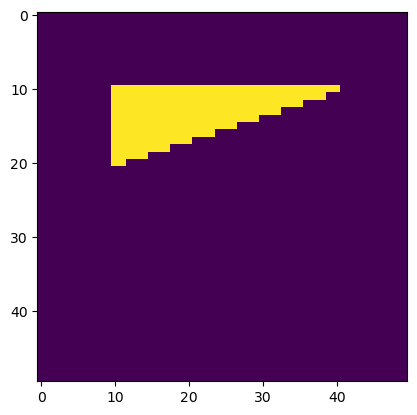

In [22]:
import matplotlib.pyplot as plt

img = np.zeros((50, 50))
poly = [[10, 10], [10, 20], [40, 10], [10, 10]]
print(f'{poly=}')

pts = np.array(poly, dtype=np.int32)
print(f'{pts=}')
print(f'{[pts]=}')
# pts = pts.reshape((-1, 1, 2))
cv2.fillPoly(img, [pts], color=255)

plt.imshow(img)